In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [4]:
DATA_DIR = "../data"
INPUT_FILE = os.path.join(DATA_DIR, "perf.psv")

In [13]:
data = []
model_id = 0
with open(INPUT_FILE, "r") as fin:
    for line in fin:
        cols = line.strip().split("|")
        cols = cols[1:-1]
        cols = [col.strip() for col in cols]
        cols = [cols[0]] + [float(col) for col in cols[1:]]
        print(cols)
        data.append(cols)
        model_id += 1

['(a) Standard - CLS', 0.371, 0.12, 0.377, 0.11, 0.384, 0.14]
['(b) Standard - Mention Pool', 0.543, 0.32, 0.562, 0.34, 0.678, 0.56]
['(c) Positional Embedding - Mention Pool', 0.54, 0.3, 0.0, 0.0, 0.675, 0.55]
['(d) Entity Markers - CLS', 0.381, 0.07, 0.84, 0.75, 0.83, 0.83]
['(d1) Entity Type Markers - CLS', 0.363, 0.12, 0.375, 0.11, 0.37, 0.12]
['(e) Entity Markers - Mention Pool', 0.835, 0.73, 0.827, 0.7, 0.746, 0.64]
['(e1) Entity Type Markers - Mention Pool', 0.833, 0.72, 0.823, 0.7, 0.735, 0.62]
['(f) Entity Markers - Entity Start', 0.855, 0.77, 0.821, 0.7, 0.733, 0.61]
['(f1) Entity Type Markers - Entity Start', 0.855, 0.77, 0.82, 0.69, 0.744, 0.63]


In [20]:
models, acc_data, f1_data = [], [], []
for row in data:
    models.append(row[0])
    acc_data.append([row[1], row[3], row[5]])
    f1_data.append([row[2], row[4], row[6]])

acc_data = np.array(acc_data)
f1_data = np.array(f1_data)

acc_data.shape, f1_data.shape, len(models)

((9, 3), (9, 3), 9)

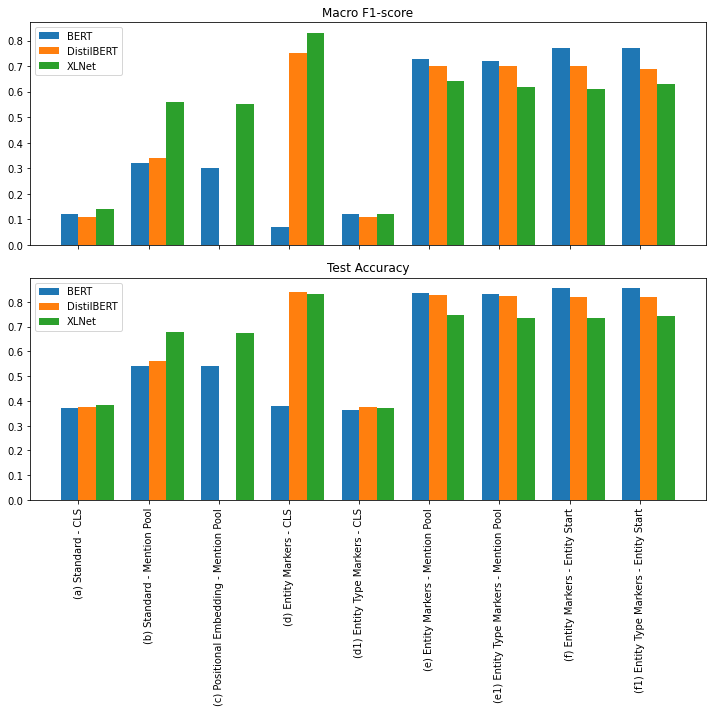

In [39]:
ind = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.bar(ind, f1_data[:, 0], width, label="BERT")
plt.bar(ind+width, f1_data[:, 1], width, label="DistilBERT")
plt.bar(ind+(2*width), f1_data[:, 2], width, label="XLNet")
plt.xticks(ind + width / 2, [])
plt.legend(loc="best")
plt.title("Macro F1-score")

plt.subplot(2, 1, 2)
plt.bar(ind, acc_data[:, 0], width, label="BERT")
plt.bar(ind+width, acc_data[:, 1], width, label="DistilBERT")
plt.bar(ind+(2*width), acc_data[:, 2], width, label="XLNet")
plt.xticks(ind + width / 2, models, rotation="90")
plt.legend(loc="best")
plt.title("Test Accuracy")

plt.tight_layout()
_ = plt.show()
